In [1]:
import pickle
import pandas as pd
import numpy as np
import re
#import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from  sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
futures_close = pd.read_csv('futures_close.csv')

In [3]:
futures_close.index = pd.to_datetime(futures_close.date)
futures_close = futures_close.drop(['date'],axis=1)
futures_close.head()

,ES,NQ,CD,EC,JY,MP,TY,US,C,S,W,CL,GC
date,,,,,,,,,,,,,
2014-01-02,1756.00,3701.00,0.94065,1.4714,10352.5,62420.0,113.98436,119.21875,640.00,1233.50,963.00,116.42,1330.6
2014-01-03,1755.00,3673.25,0.94465,1.4660,10355.5,62870.0,113.93749,119.12500,642.75,1234.50,970.50,114.94,1344.0
2014-01-06,1750.25,3659.50,0.94135,1.4697,10391.5,62870.0,114.23436,119.62500,646.75,1237.75,970.50,114.41,1343.4
2014-01-07,1760.25,3690.50,0.93175,1.4679,10370.5,63245.0,114.45311,119.90625,644.75,1235.00,967.00,114.65,1335.0
2014-01-08,1762.00,3706.50,0.92825,1.4644,10341.5,62720.0,113.87499,119.37500,636.25,1226.75,953.75,113.34,1330.9


In [5]:
pickle_in = open('vol.pkl',"rb")
vol_pd = pickle.load(pickle_in)
pickle_in.close()
#vol_pd.columns

In [12]:
instrument_list = ['ES', 'NQ', 'CD', 'EC', 'JY', 'MP', 'TY', 'US', 'C', 'S', 'W', 'CL', 'GC']

In [13]:
vol_dict = {inst:[key for key in vol_pd.columns if re.match(r"{}+".format(inst),key) ] for inst in instrument_list}
vol_dict['ES']

AttributeError: 'dict' object has no attribute 'columns'

In [15]:
vol_dict = vol_pd

In [16]:
vol_pd[vol_dict['ES']].head()

KeyError: 'ES'

In [8]:
futures_close.head()

,ES,NQ,CD,EC,JY,MP,TY,US,C,S,W,CL,GC
date,,,,,,,,,,,,,
2015-11-16,2033.25,4753.75,0.76455,1.1685,8856.0,49290.0,122.859375,136.28125,514.50,1036.50,756.00,59.75,1182.2
2015-11-17,2034.25,4763.50,0.76555,1.1656,8846.0,49420.0,122.921875,136.87500,515.25,1040.75,748.00,58.67,1167.2
2015-11-18,2065.00,4846.50,0.76445,1.1654,8836.0,49450.0,122.843750,136.87500,515.25,1036.50,746.50,58.91,1167.3
2015-11-19,2064.50,4854.00,0.76695,1.1740,8882.0,49980.0,122.968750,137.71875,517.50,1038.75,752.75,58.68,1176.5
2015-11-20,2074.00,4883.50,0.76415,1.1660,8883.5,50340.0,122.859375,137.46875,517.25,1036.25,750.00,58.86,1174.7


In [9]:
#futures_returns = ( futures_close.shift(-2) - futures_close.shift(-1) ) / futures_close.shift(-1)
#y_rets = futures_returns.ES[futures_returns.index >= vol_pd.index[0]]
#y = 1 * ((futures_returns.ES[futures_returns.index >= vol_pd.index[0]] ) >=0)

In [10]:
futures_returns = ( futures_close.shift(-2) - futures_close.shift(-1) ) / futures_close.shift(-1)
y_rets_dict = {inst:futures_returns[inst][futures_returns.index >= vol_pd.index[0]] for inst in instrument_list}
y_dict = {inst: 1 * ((y_rets_dict[inst] -np.mean(y_rets_dict[inst])/2) >=0) for inst in instrument_list}

In [11]:
futures_returns.head()

,ES,NQ,CD,EC,JY,MP,TY,US,C,S,W,CL,GC
date,,,,,,,,,,,,,
2015-11-16,0.015116,0.017424,-0.001437,-0.000172,-0.001130,0.000607,-0.000636,0.000000,0.000000,-0.004084,-0.002005,0.004091,0.000086
2015-11-17,-0.000242,0.001548,0.003270,0.007379,0.005206,0.010718,0.001018,0.006164,0.004367,0.002171,0.008372,-0.003904,0.007881
2015-11-18,0.004602,0.006077,-0.003651,-0.006814,0.000169,0.007203,-0.000889,-0.001815,-0.000483,-0.002407,-0.003653,0.003067,-0.001530
2015-11-19,-0.002170,-0.002816,-0.002225,-0.002487,0.000056,-0.001986,0.001145,0.003637,0.005800,0.005549,0.011667,-0.002548,-0.008257
2015-11-20,0.000242,-0.002002,0.006033,0.002751,0.002870,0.002787,0.000762,0.000453,-0.007208,0.000000,-0.011532,0.019077,0.005751


In [12]:
futures_returns_60 = ( futures_close - futures_close.shift(60) ) / futures_close
futures_returns_60 = futures_returns_60.dropna()
futures_returns_60 = futures_returns_60[futures_returns_60.index >= vol_pd.index[0]]
futures_returns_60.columns = [col + '_60D' for col in futures_returns_60]
futures_returns_60.head()

,ES_60D,NQ_60D,CD_60D,EC_60D,JY_60D,MP_60D,TY_60D,US_60D,C_60D,S_60D,W_60D,CL_60D,GC_60D
date,,,,,,,,,,,,,
2016-11-14,-0.006767,-0.022287,-0.053804,-0.054960,-0.081135,-0.157175,-0.034673,-0.106425,-0.017609,-0.015978,-0.086814,-0.144283,-0.095242
2016-11-15,0.001933,-0.008576,-0.039369,-0.055864,-0.088359,-0.122509,-0.039253,-0.116360,-0.006349,-0.021204,-0.066504,-0.055193,-0.090763
2016-11-16,-0.002737,-0.006148,-0.040678,-0.057463,-0.087314,-0.112152,-0.038360,-0.110966,-0.001597,-0.022118,-0.060841,-0.075010,-0.093325
2016-11-17,0.007148,0.008965,-0.043173,-0.058785,-0.091834,-0.116890,-0.041625,-0.119403,0.006878,-0.011657,-0.049393,-0.051057,-0.086609
2016-11-18,0.006250,0.005818,-0.044325,-0.062671,-0.097524,-0.139628,-0.044703,-0.120591,0.022584,0.015635,-0.036903,-0.054236,-0.089553


In [13]:
X_dict = {}
for inst in instrument_list:
    X_dict[inst] = pd.concat([futures_returns_60[inst+'_60D'],vol_pd[vol_dict[inst]]],axis=1)
    not_na_index =  (~y_dict[inst].isna()) 
    X_dict[inst] = X_dict[inst][not_na_index].fillna(X_dict[inst].mean())
    y_dict[inst] = y_dict[inst][not_na_index].fillna(X_dict[inst].mean())

In [14]:
#not_na_index =  ~y.isna()
#X = X[not_na_index]
#y = y[not_na_index]

In [15]:
y_dict['ES'].head()

date
2016-11-14    0
2016-11-15    1
2016-11-16    0
2016-11-17    1
2016-11-18    1
Name: ES, dtype: int32

In [16]:
instrument_list = ['ES', 'NQ', 'CD', 'EC', 'MP', 'C', 'S', 'W', 'CL', 'GC']

In [17]:
strat_rets = pd.DataFrame()
strat_rets_cum = pd.DataFrame()
strat_port = pd.DataFrame()
for inst in instrument_list:
    X_train, X_test, y_train, y_test = train_test_split(X_dict[inst], y_dict[inst], test_size=0.50, shuffle=False )
    X_train, X_embargo, y_train, y_embargo = train_test_split(X_train, y_train, test_size=0.01, shuffle=False)
    #print(X_train)
    ddd = X_test.shape[0]
    random_forest = RandomForestClassifier(n_estimators=5000, max_features = 10, max_depth=15)
    random_forest.fit(X_train,y_train)
    random_forest_train_score = random_forest.score(X_train,y_train)
    random_forest_test_score = random_forest.score(X_test,y_test)
    #print("RF accuracy, {} train: ".format(inst), random_forest_train_score)
    #print("RF accuracy, {} test: ".format(inst), random_forest_test_score)
    pred = 2*random_forest.predict(X_test)-1
    pred[random_forest.predict_proba(X_test).max(axis=1)<=0.55] = 0
    strat_port[inst] = pred
    print('{} sharpe: {}'.format(inst,np.mean(y_rets_dict[inst][-ddd:-2]*pred[:-2])/np.std(y_rets_dict[inst][-ddd:-2]*pred[:-2])))
    strat_rets[inst] = y_rets_dict[inst][-ddd:-2]*pred[:-2]
    strat_rets_cum[inst] = (1+y_rets_dict[inst][-ddd:-2]*pred[:-2]).cumprod()

ES sharpe: 0.03450310720510393
NQ sharpe: 0.04030752795819846
CD sharpe: -0.016155366129861622
EC sharpe: 0.038279479779616134
MP sharpe: 0.04675580275826303
C sharpe: -0.03243150468171054
S sharpe: -0.009130385869950025
W sharpe: -0.015106554062348676
CL sharpe: 0.057262824429473495
GC sharpe: 0.03781550814877307


0.9075618168949129
0.057171020640997085


C:\Users\PC\Anaconda3\envs\cs109a\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


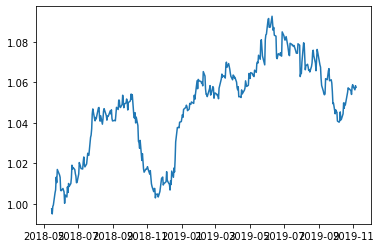

In [18]:
sharpe_port = np.mean(strat_rets.sum(axis=1)/len(instrument_list))/np.std(strat_rets.sum(axis=1)/len(instrument_list))
print(sharpe_port * np.sqrt(252))
print(sharpe_port)
plt.plot(strat_rets_cum.sum(axis=1)/len(instrument_list))

In [19]:
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, shuffle = False)
X_train, X_embargo, y_train, y_embargo = train_test_split(X_train, y_train, test_size=0.01, shuffle = False)
'''

'\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, shuffle = False)\nX_train, X_embargo, y_train, y_embargo = train_test_split(X_train, y_train, test_size=0.01, shuffle = False)\n'

In [20]:
'''
tree = DecisionTreeClassifier(max_depth=1)
tree.fit(X_train,y_train)
tree.score(X_train,y_train)
tree.score(X_test,y_test)
tree.feature_importances_
ddd = X_test.shape[0]
txx= 2*tree.predict(X_test)-1
txx[tree.predict_proba(X_test).max(axis=1)<=0.56] = 0
print(np.mean(y_rets[-ddd:-2]*txx[:-2])/np.std(y_rets[-ddd:-2]*txx[:-2]))
rets =(1+y_rets[-ddd:-2]*txx[:-2]).cumprod()
plt.plot((1+y_rets[-ddd:-2]*txx[:-2]).cumprod())
'''

'\ntree = DecisionTreeClassifier(max_depth=1)\ntree.fit(X_train,y_train)\ntree.score(X_train,y_train)\ntree.score(X_test,y_test)\ntree.feature_importances_\nddd = X_test.shape[0]\ntxx= 2*tree.predict(X_test)-1\ntxx[tree.predict_proba(X_test).max(axis=1)<=0.56] = 0\nprint(np.mean(y_rets[-ddd:-2]*txx[:-2])/np.std(y_rets[-ddd:-2]*txx[:-2]))\nrets =(1+y_rets[-ddd:-2]*txx[:-2]).cumprod()\nplt.plot((1+y_rets[-ddd:-2]*txx[:-2]).cumprod())\n'

In [21]:
'''
dot_data = export_graphviz(tree, out_file=None, 
                      feature_names=X_train.columns,  
                     class_names=[str(1),str(-1)],  
                     filled=True, rounded=True,  
                    special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 
'''

'\ndot_data = export_graphviz(tree, out_file=None, \n                      feature_names=X_train.columns,  \n                     class_names=[str(1),str(-1)],  \n                     filled=True, rounded=True,  \n                    special_characters=True)  \ngraph = graphviz.Source(dot_data)  \ngraph \n'

In [22]:
'''
random_forest = RandomForestClassifier(n_estimators=10000, max_features = 10, max_depth=15)
random_forest.fit(X_train,y_train)
random_forest_train_score = random_forest.score(X_train,y_train)
random_forest_test_score = random_forest.score(X_test,y_test)
print("Random forest accuracy on the train set: ", random_forest_train_score)
print("Random forest accuracy on the test set: ", random_forest_test_score)
'''

'\nrandom_forest = RandomForestClassifier(n_estimators=10000, max_features = 10, max_depth=15)\nrandom_forest.fit(X_train,y_train)\nrandom_forest_train_score = random_forest.score(X_train,y_train)\nrandom_forest_test_score = random_forest.score(X_test,y_test)\nprint("Random forest accuracy on the train set: ", random_forest_train_score)\nprint("Random forest accuracy on the test set: ", random_forest_test_score)\n'